In [32]:
import os 
import pickle
import pandas as pd 
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
#

In [1]:
target_dir = r'C:\Users\timothyelder\Documents\content-analysis-2018\data\PLOSone'

In [3]:
file_names = []
raw_contents = []
for file in (file for file in os.scandir(target_dir) if file.is_file() and not file.name.startswith('.')):
    file_names.append(file.name)
    with open(file.path, encoding="utf8") as f:
        raw_contents.append(BeautifulSoup(f.read(), 'xml'))
        

In [17]:
print(raw_contents[4])

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE article PUBLIC "-//NLM//DTD Journal Publishing DTD v3.0 20080202//EN" "http://dtd.nlm.nih.gov/publishing/3.0/journalpublishing3.dtd">
<article article-type="research-article" dtd-version="3.0" xml:lang="en" xmlns:mml="http://www.w3.org/1998/Math/MathML" xmlns:xlink="http://www.w3.org/1999/xlink">
<front>
<journal-meta>
<journal-id journal-id-type="publisher-id">plos</journal-id>
<journal-id journal-id-type="nlm-ta">PLoS Biol</journal-id>
<journal-id journal-id-type="pmc">plosbiol</journal-id><journal-title-group>
<journal-title>PLoS Biology</journal-title></journal-title-group>
<issn pub-type="ppub">1544-9173</issn>
<issn pub-type="epub">1545-7885</issn>
<publisher>
<publisher-name>Public Library of Science</publisher-name>
<publisher-loc>San Francisco, USA</publisher-loc></publisher>
</journal-meta>
<article-meta>
<article-id pub-id-type="publisher-id">PBIOLOGY-D-12-04606</article-id>
<article-id pub-id-type="doi">10.1371/journal.pbio.1

In [16]:
print(file_names[4])

journal.pbio.1001552.xml


In [6]:
temp_subjects = []
for i in raw_contents:
    temp_subjects.append(i.findAll('subject'))

In [7]:
set_subjects = []
subjects_temp = []
for i in temp_subjects:
    set_subjects=set(i)
    subjects_temp.append(list(set_subjects))

In [15]:
subjects_temp[4]

[<subject>Biology</subject>, <subject>Community Page</subject>]

In [18]:
subjects = []
for nlist in subjects_temp:
    row = []
    for item in nlist:
       row.append(item.text)
    subjects.append(row)

In [19]:
subjects_normal = []
for nlist in subjects:
    row = []
    for item in nlist:
       row.append(item.lower())
    subjects_normal.append(row)

In [47]:
subjects_normal

[['correction'],
 ['biotechnology',
  'cell biology',
  'synopsis',
  'oncology',
  'mus (mouse)',
  'biochemistry/drug discovery',
  'molecular biology'],
 ['genetics and genomics',
  'computational biology/systems biology',
  'biophysics',
  'synopsis',
  'microbiology'],
 ['microbiology',
  'genetics and genomics',
  'research article',
  'gastroenterology and hepatology',
  'ecology',
  'mus (mouse)',
  'eubacteria',
  'immunology',
  'evolutionary biology'],
 ['biology', 'community page'],
 ['computational biology',
  'plants',
  'yeast and fungi',
  'eukaryotes',
  'animals',
  'correspondence',
  'evolutionary biology'],
 ['drugs and devices',
  'research article',
  'biology',
  'computer modeling',
  'computational biology',
  'computer science',
  'chemical biology',
  'chemistry',
  'computer science',
  'computational biology',
  'medicine',
  'medicinal chemistry'],
 ['research article',
  'biology',
  'computational biology',
  'systems biology',
  'computational biology'

In [49]:
for i in subjects_normal:
    if len(i) == 1:
        print(i)

['correction']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['research article']
['correction']
['research article']
['pearls']
['research article']
['correction']
['correction']
['correction']
['correction']


In [33]:
for i in subjects_normal:
    if 'immunology'.lower() in i:
        print('Yes')
    else:
        print('No')

No
No
No
Yes
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
Yes
Yes
No
No
Yes
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
Yes
No
No
Yes
No
No
Yes
No
No
No
No
No
Yes
No
No
No
Yes
No
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
Yes
No
No
No
No
No
No
No
No
No
No
Yes
No
Yes
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No


In [35]:
#I want to create a histogram which displays the number of subject headings the articles are using=
#This foor loop creats a list which has the value of all the lengths of all the lists which contain the sbjects. 
subjects_lengths = []
for i in subjects_normal:
    subjects_lengths.append(len(i))
    

In [42]:
subjects_lengths

[1,
 7,
 5,
 9,
 2,
 7,
 12,
 6,
 8,
 14,
 18,
 1,
 1,
 42,
 35,
 5,
 3,
 6,
 8,
 11,
 6,
 19,
 7,
 10,
 20,
 24,
 27,
 41,
 22,
 10,
 9,
 4,
 1,
 3,
 43,
 30,
 12,
 7,
 12,
 11,
 18,
 13,
 13,
 14,
 5,
 9,
 10,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 30,
 1,
 1,
 1,
 1,
 34,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 23,
 40,
 28,
 35,
 35,
 20,
 24,
 32,
 23,
 23,
 36,
 19,
 26,
 41,
 21,
 30,
 30,
 27,
 39,
 32,
 25,
 24,
 33,
 37,
 30,
 38,
 45,
 1,
 27,
 29,
 34,
 19,
 31,
 30,
 29,
 31,
 31,
 34,
 26,
 30,
 36,
 25,
 38,
 1,
 34,
 27,
 37,
 27,
 32,
 29,
 26,
 17,
 28,
 21,
 22,
 28,
 26,
 33,
 26,
 17,
 31,
 31,
 32,
 22,
 30,
 19,
 22,
 2,
 12,
 1,
 1,
 1,
 1,
 1,
 1]

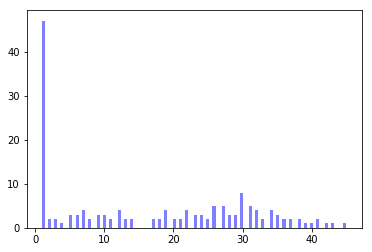

In [46]:
num_bins = 100
n, bins, patches = plt.hist(subjects_lengths, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [ ]:
 plos_df = pd.read_pickle(r'C:\Users\timothyelder\Documents\plos_analysis\plos_sample.pk1')

In [91]:
plos_df

,Article Contents,Copyright Year,Journal Title,Titles
0,The study of animal communication is a complex...,2011,plos one,UV-Deprived Coloration Reduces Success in Mate...
1,Aneurysms in general represent a Damocles swor...,2017,plos one,Metabolomic profiling of ascending thoracic ao...
2,Prognostic information about life expectancy i...,2013,plos one,Predictive Value of a Profile of Routine Blood...
3,Interleukin (IL)-23 has been associated with t...,2017,plos one,Continuous IL-23 stimulation drives ILC3 deple...
4,Labor represents a stress test for the fetus. ...,2014,plos one,Assessment of Coupling between Trans-Abdominal...
5,Competition has long been recognized as a crit...,2014,plos one,Seaweed-Coral Interactions: Variance in Seawee...
6,There were errors in the legend of Figure 11. ...,2012,plos one,Correction: The Zinc Dyshomeostasis Hypothesis...
7,Phylogeographic studies leverage spatial and g...,2017,plos biology,A latitudinal phylogeographic diversity gradie...
8,Insulin-like Growth Factor-1 (IGF-1) is a pote...,2012,plos one,E-Peptides Control Bioavailability of IGF-1
9,Despite the expansive development of targeted ...,2014,plos one,Advancements in the Development of HIF-1α-Acti...


In [ ]:
def ExtractSubjects